In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in
import warnings
warnings.filterwarnings("ignore")

import numpy as np
from sklearn.base import BaseEstimator,TransformerMixin, ClassifierMixin
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.linear_model import ElasticNetCV, LassoLarsCV, LinearRegression, HuberRegressor, RANSACRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.pipeline import make_pipeline, make_union
from sklearn.utils import check_array
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.random_projection import GaussianRandomProjection
from sklearn.random_projection import SparseRandomProjection
from sklearn.decomposition import PCA, FastICA
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

In [40]:
import pickle
# train = pickle.load(open('train.pkl', 'rb'))
train = pd.read_csv('../../data/train.csv')
test = pd.read_csv('../../data/test.csv')
test.insert(1, 'y', [np.nan for i in range(test.shape[0])])
train_feat = train[test.columns]
full = train_feat.append(test, ignore_index=True)

In [65]:
xm = full.groupby('X0')['X0','y'].median()

In [68]:
xc = full.groupby('X0')['X0'].count()

In [69]:
data= pd.DataFrame(data=xm.index)

In [70]:
data['median'] = xm.y.as_matrix()
data['count'] = xc.as_matrix()

In [71]:
data.sort_values('median', ascending=True).head(20)

,X0,median,count
28,bc,76.640,12
24,az,76.810,336
3,ac,89.620,1
12,am,89.955,46
38,l,89.955,22
25,b,90.360,24
16,aq,90.370,29
47,u,90.730,37
4,ad,90.790,26
31,e,90.800,80


In [76]:
train.groupby('X261')['y'].mean()

X261
0     94.322779
1    109.448817
Name: y, dtype: float64

In [82]:
train.groupby('X314')['y'].median()

X314
0     91.54
1    108.54
Name: y, dtype: float64

In [81]:
train.groupby('X261')['y'].median()

X261
0     91.63
1    108.50
Name: y, dtype: float64

In [80]:
train.groupby('X127')['y'].median()

X127
0    108.25
1     91.63
Name: y, dtype: float64

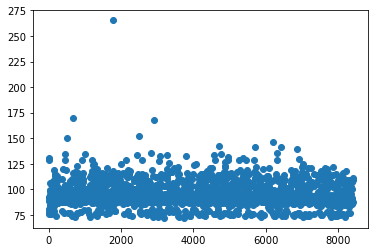

In [85]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(train[train.X261==0].ID,train[train.X261==0].y)

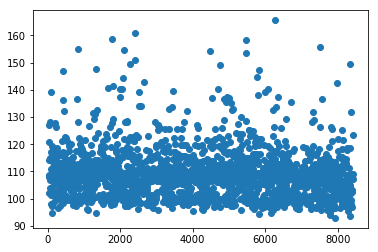

In [92]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(train[train.X261==1].ID,train[train.X261==1].y)